In [1]:
#Imports
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
from sklearn.metrics import mean_absolute_error, r2_score

In [3]:
from sklearn.model_selection import cross_val_score, KFold

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
from sklearn.model_selection import GridSearchCV

In [4]:
#Read data
soiYield = pd.read_csv('DATA/crop_yield_plus_soi.csv')

In [5]:
soiYield.head(5)

,Year,Corn Yield,Cotton Yield,Rice Yield,Soybean Yield,Wheat Yield,Yield Units,DJFM Mean SOI
0,2023,147.0,41.0,167.0,45.0,70.0,bu / acre,1.28
1,2022,161.0,39.0,176.0,45.5,60.0,bu / acre,1.23
2,2021,159.0,39.0,179.0,49.0,65.0,bu / acre,1.40
3,2020,171.0,36.0,161.0,51.0,62.0,bu / acre,-0.15
4,2019,155.0,37.0,164.0,46.0,63.0,bu / acre,-0.17


In [6]:
soiYield.shape

(72, 8)

In [7]:
soiYield_inverted = soiYield.sort_values(by= "Year", ascending= True)

In [8]:
soiYield_inverted.head(5)

,Year,Corn Yield,Cotton Yield,Rice Yield,Soybean Yield,Wheat Yield,Yield Units,DJFM Mean SOI
71,1952,41.0,11.0,54.0,18.5,22.0,bu / acre,-0.43
70,1953,33.5,12.0,56.0,13.5,26.0,bu / acre,-0.40
69,1954,23.0,15.0,59.0,14.5,30.0,bu / acre,0.05
68,1955,40.0,16.0,58.0,17.5,31.0,bu / acre,0.85
67,1956,48.0,18.0,67.0,20.0,30.5,bu / acre,1.30


In [9]:
soiYield_inverted.tail(5)

,Year,Corn Yield,Cotton Yield,Rice Yield,Soybean Yield,Wheat Yield,Yield Units,DJFM Mean SOI
4,2019,155.0,37.0,164.0,46.0,63.0,bu / acre,-0.17
3,2020,171.0,36.0,161.0,51.0,62.0,bu / acre,-0.15
2,2021,159.0,39.0,179.0,49.0,65.0,bu / acre,1.40
1,2022,161.0,39.0,176.0,45.5,60.0,bu / acre,1.23
0,2023,147.0,41.0,167.0,45.0,70.0,bu / acre,1.28


In [10]:
#Can I predict the winter wheat harvest from the harvest of corn, soybeans, cotton, rice?  Winter wheat is
#typically planted in the fall season and harvested in the summer season of the following year.  For example,
#winter wheat that was planted in the fall of 2022 was harvestd in the summer of 2023.  Thus, can I use the 
#fall 2002 yield of corn, soybeans, cotton, and rice to predict the summer 2023 yield of winter wheat?
#
#The following code unites the corn, soybean, cotton, rice yield with the next year's winter wheat yield
years = list(soiYield_inverted["Year"])
print(years)
print(len(years))

[1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
72


In [11]:
winter_wheat = list(soiYield_inverted["Wheat Yield"])
print(winter_wheat)
print(len(winter_wheat))

[22.0, 26.0, 30.0, 31.0, 30.5, 23.0, 28.0, 25.0, 28.5, 30.5, 27.0, 33.0, 31.5, 27.5, 34.0, 32.0, 33.0, 31.0, 33.0, 40.0, 39.0, 30.0, 29.0, 33.0, 33.0, 39.0, 34.0, 44.0, 43.0, 42.0, 34.0, 38.0, 41.0, 39.0, 33.0, 46.0, 49.0, 47.0, 38.0, 32.0, 48.0, 38.0, 45.0, 39.0, 39.0, 54.0, 46.0, 48.0, 52.0, 54.0, 44.0, 61.0, 52.0, 53.0, 54.0, 43.0, 48.0, 47.0, 46.0, 50.0, 58.0, 57.0, 58.0, 53.0, 70.0, 68.0, 59.0, 63.0, 62.0, 65.0, 60.0, 70.0]
72


In [12]:
target_var = []
for i, yr in enumerate(years):
    
    #print(yr)
    
    if yr < 2023:
        
        hold = winter_wheat[i + 1]
        target_var.append(hold)
        
    else:
        
        target_var.append(np.nan)

In [13]:
print(target_var)

[26.0, 30.0, 31.0, 30.5, 23.0, 28.0, 25.0, 28.5, 30.5, 27.0, 33.0, 31.5, 27.5, 34.0, 32.0, 33.0, 31.0, 33.0, 40.0, 39.0, 30.0, 29.0, 33.0, 33.0, 39.0, 34.0, 44.0, 43.0, 42.0, 34.0, 38.0, 41.0, 39.0, 33.0, 46.0, 49.0, 47.0, 38.0, 32.0, 48.0, 38.0, 45.0, 39.0, 39.0, 54.0, 46.0, 48.0, 52.0, 54.0, 44.0, 61.0, 52.0, 53.0, 54.0, 43.0, 48.0, 47.0, 46.0, 50.0, 58.0, 57.0, 58.0, 53.0, 70.0, 68.0, 59.0, 63.0, 62.0, 65.0, 60.0, 70.0, nan]


In [14]:
df_target_var = pd.DataFrame({'Year': years, 'Target': target_var})

In [15]:
df_target_var.head(5)

,Year,Target
0,1952,26.0
1,1953,30.0
2,1954,31.0
3,1955,30.5
4,1956,23.0


In [16]:
df_target_var.tail(5)

,Year,Target
67,2019,62.0
68,2020,65.0
69,2021,60.0
70,2022,70.0
71,2023,NaN


In [17]:
df_merged = pd.merge(soiYield_inverted, df_target_var, on= "Year", how="left")

In [18]:
df_merged.head()

,Year,Corn Yield,Cotton Yield,Rice Yield,Soybean Yield,Wheat Yield,Yield Units,DJFM Mean SOI,Target
0,1952,41.0,11.0,54.0,18.5,22.0,bu / acre,-0.43,26.0
1,1953,33.5,12.0,56.0,13.5,26.0,bu / acre,-0.40,30.0
2,1954,23.0,15.0,59.0,14.5,30.0,bu / acre,0.05,31.0
3,1955,40.0,16.0,58.0,17.5,31.0,bu / acre,0.85,30.5
4,1956,48.0,18.0,67.0,20.0,30.5,bu / acre,1.30,23.0


In [19]:
df_merged.tail()

,Year,Corn Yield,Cotton Yield,Rice Yield,Soybean Yield,Wheat Yield,Yield Units,DJFM Mean SOI,Target
67,2019,155.0,37.0,164.0,46.0,63.0,bu / acre,-0.17,62.0
68,2020,171.0,36.0,161.0,51.0,62.0,bu / acre,-0.15,65.0
69,2021,159.0,39.0,179.0,49.0,65.0,bu / acre,1.40,60.0
70,2022,161.0,39.0,176.0,45.5,60.0,bu / acre,1.23,70.0
71,2023,147.0,41.0,167.0,45.0,70.0,bu / acre,1.28,NaN


In [20]:
col_to_drop = ["Wheat Yield", "Yield Units"]

df_merged.drop(columns= col_to_drop, inplace=True)

In [21]:
df_merged.head(5)

,Year,Corn Yield,Cotton Yield,Rice Yield,Soybean Yield,DJFM Mean SOI,Target
0,1952,41.0,11.0,54.0,18.5,-0.43,26.0
1,1953,33.5,12.0,56.0,13.5,-0.40,30.0
2,1954,23.0,15.0,59.0,14.5,0.05,31.0
3,1955,40.0,16.0,58.0,17.5,0.85,30.5
4,1956,48.0,18.0,67.0,20.0,1.30,23.0


In [22]:
df_merged.rename(columns={"Target":"WinterWheat Yield"}, inplace=True)

In [23]:
df_merged.head(5)

,Year,Corn Yield,Cotton Yield,Rice Yield,Soybean Yield,DJFM Mean SOI,WinterWheat Yield
0,1952,41.0,11.0,54.0,18.5,-0.43,26.0
1,1953,33.5,12.0,56.0,13.5,-0.40,30.0
2,1954,23.0,15.0,59.0,14.5,0.05,31.0
3,1955,40.0,16.0,58.0,17.5,0.85,30.5
4,1956,48.0,18.0,67.0,20.0,1.30,23.0


In [24]:
print(df_merged.isnull().sum())

Year                 0
Corn Yield           0
Cotton Yield         0
Rice Yield           0
Soybean Yield        0
DJFM Mean SOI        0
WinterWheat Yield    1
dtype: int64


In [25]:
df_merged.tail(5)

,Year,Corn Yield,Cotton Yield,Rice Yield,Soybean Yield,DJFM Mean SOI,WinterWheat Yield
67,2019,155.0,37.0,164.0,46.0,-0.17,62.0
68,2020,171.0,36.0,161.0,51.0,-0.15,65.0
69,2021,159.0,39.0,179.0,49.0,1.40,60.0
70,2022,161.0,39.0,176.0,45.5,1.23,70.0
71,2023,147.0,41.0,167.0,45.0,1.28,NaN


In [26]:
df_merged.dropna(how='any', inplace=True)

In [27]:
print(df_merged.isnull().sum())

Year                 0
Corn Yield           0
Cotton Yield         0
Rice Yield           0
Soybean Yield        0
DJFM Mean SOI        0
WinterWheat Yield    0
dtype: int64


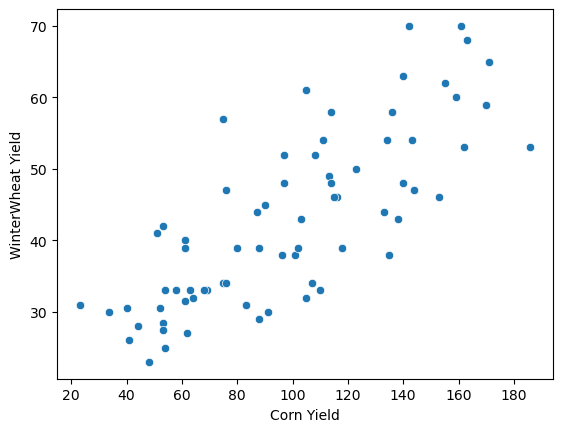

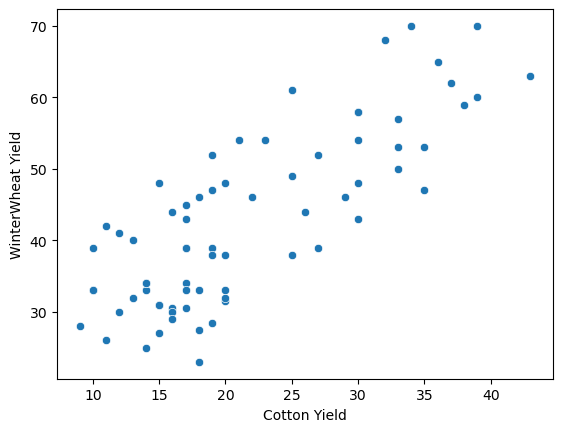

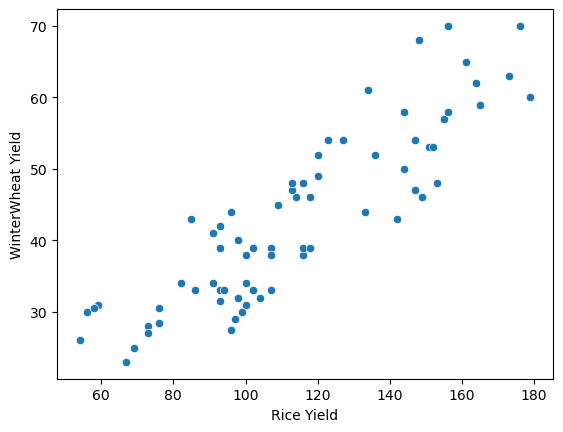

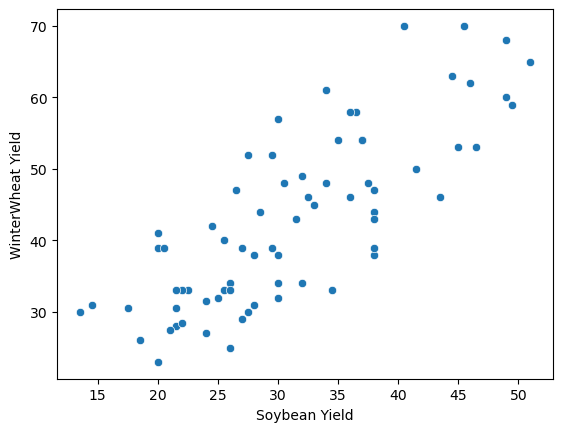

In [28]:
#Let's look at the data: winter wheat yield VS corn, cotton, rice, soybean yields
feature_vars = ["Corn Yield", "Cotton Yield", "Rice Yield", "Soybean Yield"]

for feature in feature_vars:
    
    sns.scatterplot(y="WinterWheat Yield", x=feature, data=df_merged)
    plt.show()

In [29]:
#Prepare feature and target data for modeling 
X = df_merged[feature_vars]
y = df_merged["WinterWheat Yield"]

In [30]:
#scale feature data 
feature_names = X.columns

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [31]:
#split data into train and test datasets 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [32]:
#run linear regression model and examine the "goodness" of model
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [33]:
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Print the evaluation metrics
print("Train Mean Squared Error:", mse_train)
print("Train Root Mean Squared Error:", rmse_train)
print("Train Mean Absolute Error:", mae_train)
print("Train R-squared:", r2_train)

Train Mean Squared Error: 35.09722729357787
Train Root Mean Squared Error: 5.924291290405788
Train Mean Absolute Error: 5.150769995110059
Train R-squared: 0.7725339363615542


In [34]:
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the evaluation metrics for the test data
print("Test Mean Squared Error:", mse_test)
print("Test Root Mean Squared Error:", rmse_test)
print("Test Mean Absolute Error:", mae_test)
print("Test R-squared:", r2_test)

Test Mean Squared Error: 25.733715330439942
Test Root Mean Squared Error: 5.0728409526063345
Test Mean Absolute Error: 4.3656138221970915
Test R-squared: 0.7633063026831759


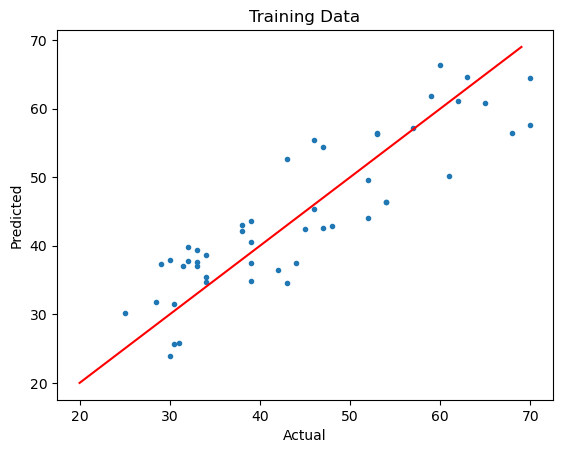

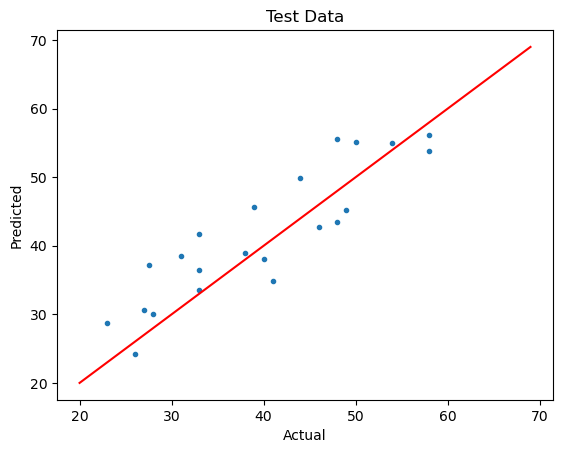

In [35]:
#Training
plt.plot(y_train, y_train_pred, marker='.', linestyle='none')
plt.plot([x for x in range(20,70)],[x for x in range(20,70)], color='red')

plt.title("Training Data")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.show()

#Test
plt.plot(y_test, y_test_pred, marker='.', linestyle='none')
plt.plot([x for x in range(20,70)],[x for x in range(20,70)], color='red')

plt.title("Test Data")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.show()

In [ ]:
#Use cross validataion to test the robustnessa of model 

In [36]:
#Cross validation w/ shuffle=True  
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LinearRegression()
cv_results = cross_val_score(model, X_train, y_train, cv=kf)
print(cv_results)
print(np.mean(cv_results), np.std(cv_results))


[0.75615109 0.57690189 0.77098187 0.81678968 0.67252651]
0.7186702081241452 0.08484840176127323


In [38]:
#Cross validation w/ shuffle=False  
kf = KFold(n_splits=5, shuffle=False, random_state=None)
model = LinearRegression()
cv_results = cross_val_score(model, X_train, y_train, cv=kf)
print(cv_results)
print(np.mean(cv_results), np.std(cv_results))

[0.21493283 0.79236637 0.48694298 0.79458615 0.63808177]
0.585382019974921 0.21739779250540336


In [39]:
#Cross validation w/out using KFold  
model = LinearRegression()
cv_results = cross_val_score(model, X_train, y_train, cv=5)
print(cv_results)
print(np.mean(cv_results), np.std(cv_results))

[0.21493283 0.79236637 0.48694298 0.79458615 0.63808177]
0.585382019974921 0.21739779250540336


In [ ]:
#Test alternate model 

In [43]:
#Run random forest regression and examine the "goodness" of model  
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
rf_pred_train = rf_regressor.predict(X_train)
rf_pred_test = rf_regressor.predict(X_test)

In [44]:
rf_mse_train = mean_squared_error(y_train, rf_pred_train)
rf_rmse_train = mean_squared_error(y_train, rf_pred_train, squared=False)
rf_mae_train = mean_absolute_error(y_train, rf_pred_train)
rf_r2_train = r2_score(y_train, rf_pred_train)

# Print the evaluation metrics
print("RF Train Mean Squared Error:", rf_mse_train)
print("RF Train Root Mean Squared Error:", rf_rmse_train)
print("RF Train Mean Absolute Error:", rf_mae_train)
print("RF Train R-squared:", rf_r2_train)

RF Train Mean Squared Error: 5.990441836734696
RF Train Root Mean Squared Error: 2.4475379132374426
RF Train Mean Absolute Error: 2.0267346938775512
RF Train R-squared: 0.9611757871167664


In [46]:
rf_mse_test = mean_squared_error(y_test, rf_pred_test)
rf_rmse_test = mean_squared_error(y_test, rf_pred_test, squared=False)
rf_mae_test = mean_absolute_error(y_test, rf_pred_test)
rf_r2_test = r2_score(y_test, rf_pred_test)

# Print the evaluation metrics
print("RF Train Mean Squared Error:", rf_mse_test)
print("RF Train Root Mean Squared Error:", rf_rmse_test)
print("RF Train Mean Absolute Error:", rf_mae_test)
print("RF Train R-squared:", rf_r2_test)

RF Train Mean Squared Error: 26.194706818181814
RF Train Root Mean Squared Error: 5.118076476390502
RF Train Mean Absolute Error: 4.52
RF Train R-squared: 0.7590661928403449


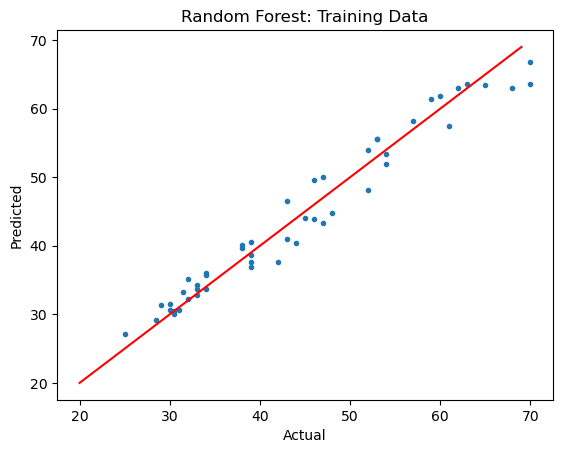

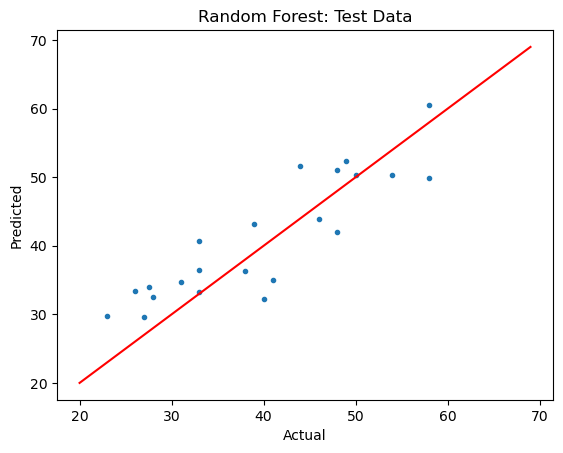

In [47]:
#Training
plt.plot(y_train, rf_pred_train, marker='.', linestyle='none')
plt.plot([x for x in range(20,70)],[x for x in range(20,70)], color='red')

plt.title("Random Forest: Training Data")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.show()

#Test
plt.plot(y_test, rf_pred_test, marker='.', linestyle='none')
plt.plot([x for x in range(20,70)],[x for x in range(20,70)], color='red')

plt.title("Random Forest: Test Data")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.show()

In [ ]:
#Use cross validataion to test the robustness of model 

In [48]:
#Cross validation w/ shuffle=True 
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
cv_results = cross_val_score(rf_regressor, X_train, y_train, cv=kf)
print(cv_results)
print(np.mean(cv_results), np.std(cv_results))

[0.69125344 0.46961126 0.7784132  0.75050499 0.63653771]
0.6652641210711095 0.10940695854666123


In [50]:
#Cross validation w/ shuffle=False 
kf = KFold(n_splits=5, shuffle=False)
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
cv_results = cross_val_score(rf_regressor, X_train, y_train, cv=kf)
print(cv_results)
print(np.mean(cv_results), np.std(cv_results))

[0.12252204 0.80351177 0.25541462 0.69151162 0.70724764]
0.5160415386624955 0.27304675003051365


In [53]:
#Test response to 'n_estimators' parameter (default = 100)

test_values = [10, 50, 100, 200, 300, 500, 1000]
test_values_mse = []

for val in test_values:
    
    rf_regressor = RandomForestRegressor(n_estimators=val, random_state=42)
    rf_regressor.fit(X_train, y_train)
    rf_pred_train = rf_regressor.predict(X_train)
    
    hold_mse = mean_squared_error(y_train, rf_pred_train)
    
    test_values_mse.append(hold_mse)

In [57]:
print(test_values_mse)

[7.736632653061225, 6.42132857142857, 5.990441836734696, 6.10397487244898, 6.09968117913832, 6.038066877551024, 6.039993520408165]


Text(0.5, 1.0, 'Random Forest Regression: MSE vs n_estimators')

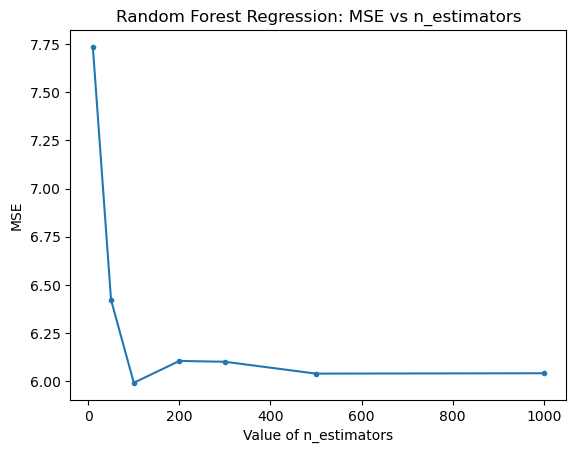

In [60]:
plt.plot(test_values, test_values_mse, marker='.')
plt.xlabel('Value of n_estimators')
plt.ylabel('MSE')
plt.title('Random Forest Regression: MSE vs n_estimators')

In [63]:
#Test response to 'min_samples_split' parameter (default = 2)

test_values = [2, 6, 10, 14, 18, 22]
test_values_mse = []

for val in test_values:
    
    rf_regressor = RandomForestRegressor(n_estimators=100, min_samples_split=val, random_state=42)
    rf_regressor.fit(X_train, y_train)
    rf_pred_train = rf_regressor.predict(X_train)
    
    hold_mse = mean_squared_error(y_train, rf_pred_train)
    
    test_values_mse.append(hold_mse)

In [64]:
print(test_values_mse)

[5.990441836734696, 12.423861286139514, 19.423890264189602, 24.59864515698942, 31.20974486882407, 36.220703272560336]


Text(0.5, 1.0, 'Random Forest Regression: MSE vs min_samples_split')

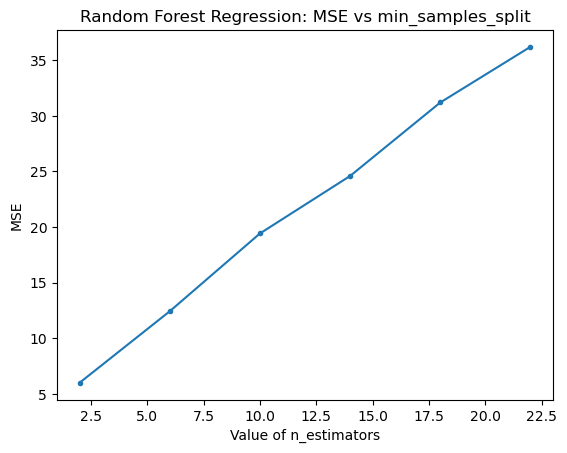

In [65]:
plt.plot(test_values, test_values_mse, marker='.')
plt.xlabel('Value of n_estimators')
plt.ylabel('MSE')
plt.title('Random Forest Regression: MSE vs min_samples_split')

In [68]:
#GridSearchCV
kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {'n_estimators': [10, 50, 100, 200, 300, 500, 1000], 'min_samples_split': [2, 6, 10, 14, 18, 22]}
rf_regressor = RandomForestRegressor(random_state=42)
rf_cv = GridSearchCV(rf_regressor, param_grid, cv=kf)
rf_cv.fit(X_train, y_train)
print(rf_cv.best_params_, rf_cv.best_score_)

{'min_samples_split': 10, 'n_estimators': 1000} 0.7186293456299551


In [70]:
#Run random forest regression w/ best parametes from GridSearchCV 
rf_regressor = RandomForestRegressor(n_estimators=1000, min_samples_split=10, random_state=42)
rf_regressor.fit(X_train, y_train)
rf_pred_train = rf_regressor.predict(X_train)
rf_pred_test = rf_regressor.predict(X_test)

In [71]:
rf_mse_train = mean_squared_error(y_train, rf_pred_train)
rf_rmse_train = mean_squared_error(y_train, rf_pred_train, squared=False)
rf_mae_train = mean_absolute_error(y_train, rf_pred_train)
rf_r2_train = r2_score(y_train, rf_pred_train)

# Print the evaluation metrics
print("RF Train Mean Squared Error:", rf_mse_train)
print("RF Train Root Mean Squared Error:", rf_rmse_train)
print("RF Train Mean Absolute Error:", rf_mae_train)
print("RF Train R-squared:", rf_r2_train)

RF Train Mean Squared Error: 19.00148558843727
RF Train Root Mean Squared Error: 4.359069348890571
RF Train Mean Absolute Error: 3.4930119003741824
RF Train R-squared: 0.8768508664821121


In [72]:
rf_mse_test = mean_squared_error(y_test, rf_pred_test)
rf_rmse_test = mean_squared_error(y_test, rf_pred_test, squared=False)
rf_mae_test = mean_absolute_error(y_test, rf_pred_test)
rf_r2_test = r2_score(y_test, rf_pred_test)

# Print the evaluation metrics
print("RF Train Mean Squared Error:", rf_mse_test)
print("RF Train Root Mean Squared Error:", rf_rmse_test)
print("RF Train Mean Absolute Error:", rf_mae_test)
print("RF Train R-squared:", rf_r2_test)

RF Train Mean Squared Error: 24.442701754703737
RF Train Root Mean Squared Error: 4.943956083411718
RF Train Mean Absolute Error: 4.383910515099014
RF Train R-squared: 0.7751807938945463


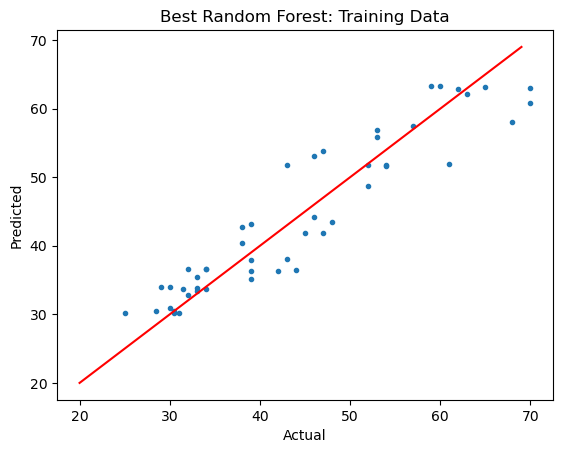

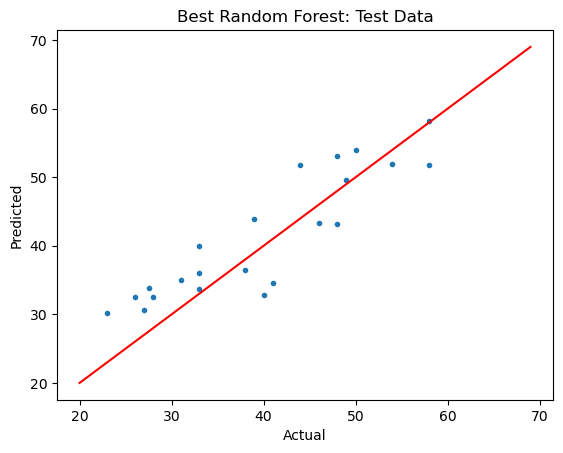

In [75]:
#Training
plt.plot(y_train, rf_pred_train, marker='.', linestyle='none')
plt.plot([x for x in range(20,70)],[x for x in range(20,70)], color='red')

plt.title("Best Random Forest: Training Data")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.show()

#Test
plt.plot(y_test, rf_pred_test, marker='.', linestyle='none')
plt.plot([x for x in range(20,70)],[x for x in range(20,70)], color='red')

plt.title("Best Random Forest: Test Data")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.show()